# 합성곱 신경망(Convolutional)을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱신경망 만들기

In [2]:
model = keras.Sequential()

In [3]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3),activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [8]:
!pip install pyparsing
!pip install graphviz
!pip install pydot

In [9]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [10]:
keras.utils.plot_model(model,show_shapes=True, to_file="cnn-architecture.png",dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## 모델 컴파일과 훈련

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5194 - accuracy: 0.8142 - val_loss: 0.3253 - val_accuracy: 0.8801
Epoch 2/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3488 - accuracy: 0.8750 - val_loss: 0.2767 - val_accuracy: 0.8980
Epoch 3/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3002 - accuracy: 0.8917 - val_loss: 0.2646 - val_accuracy: 0.9011
Epoch 4/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2668 - accuracy: 0.9019 - val_loss: 0.2414 - val_accuracy: 0.9130
Epoch 5/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2466 - accuracy: 0.9105 - val_loss: 0.2354 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2263 - accuracy: 0.9159 - val_loss: 0.2323 - val_accuracy: 0.9171
Epoch 7/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2080 - accuracy: 0.9232 - val_loss: 0.2375 -

In [12]:
import matplotlib.pyplot as plt

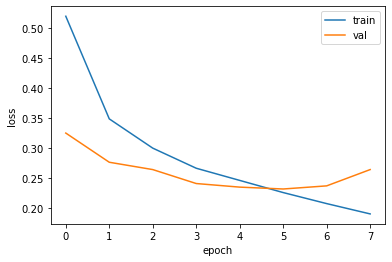

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2323 - accuracy: 0.9171


[0.2322782427072525, 0.9170833230018616]

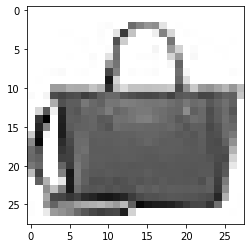

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[2.9013314e-16 1.6576870e-25 1.9932079e-18 8.9128215e-18 3.2896307e-18
  3.5396338e-14 4.2865489e-16 6.5611659e-15 1.0000000e+00 9.3816014e-15]]


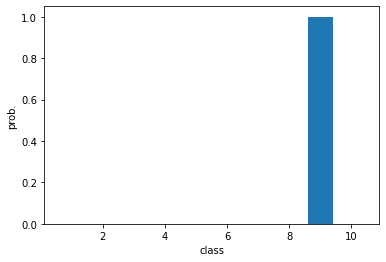

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [20]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [21]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2539 - accuracy: 0.9085


[0.25385597348213196, 0.9085000157356262]